### Lesson -3 Unvariate exploartion of Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
pokemon = pd.read_csv('files/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


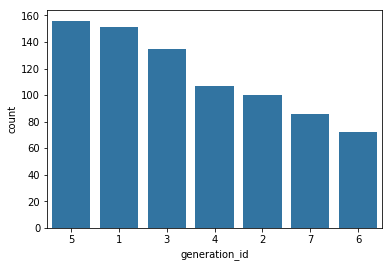

In [16]:
base_color = sb.color_palette()[0]
gen_order = pokemon.generation_id.value_counts().index
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order)


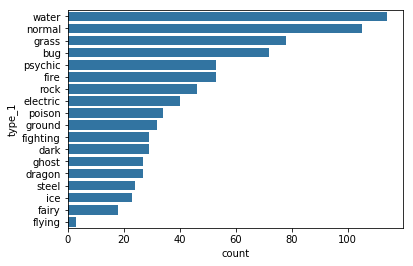

In [17]:
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data=pokemon, y='type_1', color=base_color, order=type_order)


In [22]:
pokemon.type_2.value_counts()

flying      95
poison      32
ground      32
fairy       29
psychic     29
fighting    25
steel       23
grass       19
dragon      18
water       17
dark        17
ghost       16
rock        14
fire        11
ice         11
electric     8
bug          5
normal       4
Name: type_2, dtype: int64

In [28]:
type_counts = pokemon.melt(id_vars = ['id', 'species'],
                          value_vars = ['type_1', 'type_2'],
                          var_name = 'type_level', value_name = 'type').dropna()



In [30]:
type_counts.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


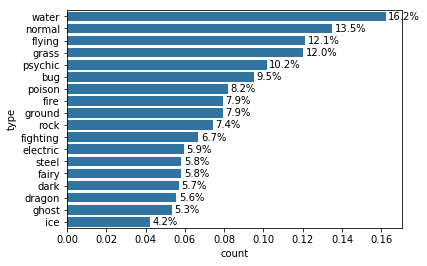

In [53]:
type_count = type_counts.type.value_counts()
type_order = types.index

sb.countplot(data = type_counts, y = 'type', color = base_color, order = type_order)
plt.xticks(tick_props*n_pokemon, tick_names);

for i in range(type_count.shape[0]):
    count = type_count[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va='center')
    

In [54]:
type_count.shape

(18,)

In [41]:
n_pokemon = pokemon.shape[0]
max_type_count = type_count[0]
max_prop = max_type_count/n_pokemon
max_prop

0.1623296158612144

In [46]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']

### Histograms

#### Using matplotlib

(array([ 0.,  3.,  4., 11., 19., 18., 43., 38., 57., 46., 53., 48., 62.,
        55., 53., 27., 45., 32., 39., 42., 36., 22., 18., 12.,  8.,  5.,
         5.,  0.,  1.,  1.,  3.,  1.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160]),
 <a list of 32 Patch objects>)

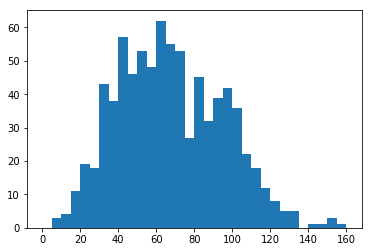

In [62]:
bin_edges = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x='speed', bins = bin_edges )

In [63]:
bin_edges

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160])

#### Using seaborn

/home/e/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


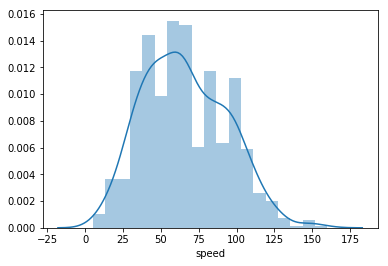

In [64]:
sb.distplot(pokemon.speed)

In [65]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


(array([ 0.,  0.,  0.,  0.,  6., 12., 29., 28., 49., 53., 66., 59., 63.,
        53., 57., 51., 52., 42., 37., 34., 29., 18., 14., 11., 10.,  4.,
        12.,  4.,  3.,  0.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230]),
 <a list of 46 Patch objects>)

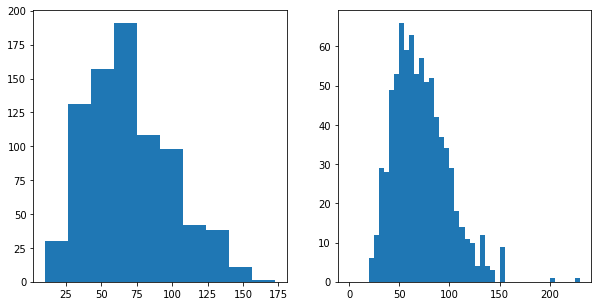

In [68]:
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.hist(data = pokemon, x = 'special-attack')

bin_edges = np.arange(0, pokemon['special-defense'].max()+5, 5)
plt.subplot(1, 2, 2)
plt.hist(data = pokemon, x = 'special-defense', bins = bin_edges)

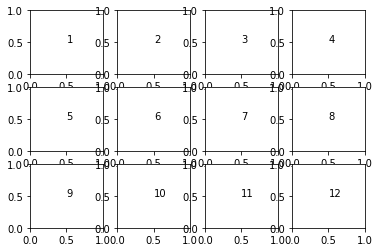

In [69]:
fig, axes = plt.subplots(3, 4)
axes = axes.flatten()
for i in range(12):
    plt.sca(axes[i])
    plt.text(0.5, 0.5, i+1)

(0, 6)

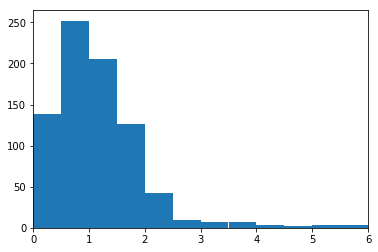

In [7]:
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(data = pokemon, x = 'height', bins = bins);
plt.xlim((0, 6))

In [10]:
np.log10(pokemon.weight.describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

([<matplotlib.axis.XTick at 0x7f32b16da3c8>,
 <a list of 9 Text xticklabel objects>)

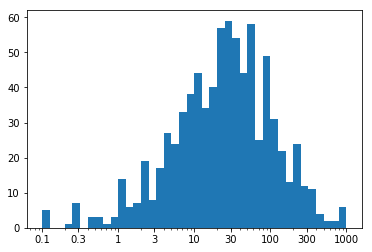

In [19]:
log_bins = 10**np.arange(-1, np.log10(pokemon.weight).max()+0.1, 0.1)
plt.hist(data=pokemon, x='weight', bins=log_bins)
plt.xscale('log')
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

In [15]:
np.log10(pokemon.weight).max()

2.9999565683801923

### Bivariate data visualization

In [21]:
df = pd.read_csv('files/fuel-econ.csv')
df.head()


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

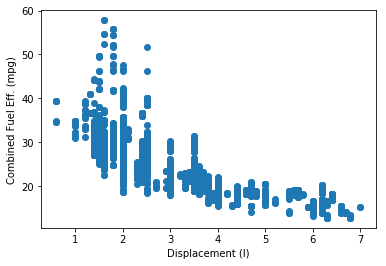

In [22]:
plt.scatter(data = df, x = 'displ', y = 'comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

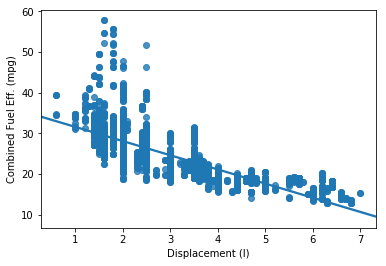

In [26]:
# usin seaborn library
sb.regplot(data = df, x = 'displ', y = 'comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');


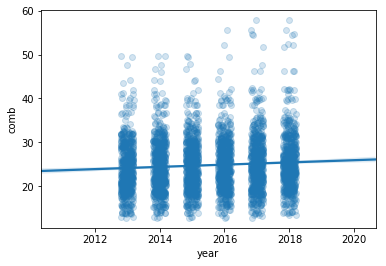

In [31]:
sb.regplot(data = df, x = 'year', y = 'comb', x_jitter = 0.2, scatter_kws = {'alpha': 1/5}) # here scatter_kws for more noise

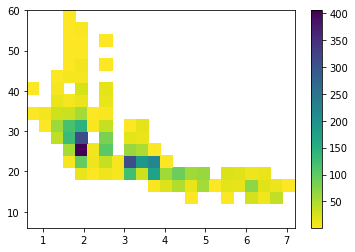

In [41]:
xbin_edges = np.arange(0.6, df.displ.max()+0.3, 0.3)
ybin_edges = np.arange(6, df.comb.max()+ 3, 3)
plt.hist2d(data = df, x = 'displ', y = 'comb', cmin = 0.1, cmap = 'viridis_r', bins = [xbin_edges, ybin_edges]);
plt.colorbar()

In [34]:
df[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400
